In [3]:
mydata=read.csv("state_demographics.csv")

In [4]:
head(mydata)

State,Population.Population.Percent.Change,Population.2014.Population,Population.2010.Population,Age.Percent.Under.5.Years,Age.Percent.Under.18.Years,Age.Percent.65.and.Older,Miscellaneous.Percent.Female,Ethnicities.White.Alone,Ethnicities.Black.Alone,...,Employment.Nonemployer.Establishments,Employment.Firms.Total,Employment.Firms.Men.Owned,Employment.Firms.Women.Owned,Employment.Firms.Minority.Owned,Employment.Firms.Nonminority.Owned,Employment.Firms.Veteran.Owned,Employment.Firms.Nonveteran.Owned,Population.Population.per.Square.Mile,Miscellaneous.Land.Area
Connecticut,-10.2,3605944,3574097,5.1,20.4,17.7,51.2,79.7,12.2,...,286874,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36
Delaware,8.4,989948,897934,5.6,20.9,19.4,51.7,69.2,23.2,...,68623,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54
District of Columbia,17.3,689545,601723,6.4,18.2,12.4,52.6,46.0,46.0,...,62583,63408,30237,27064,29983,29521,5070,54217,9856.5,61.05
Florida,14.2,21538187,18801310,5.3,19.7,20.9,51.1,77.3,16.9,...,2388050,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76
Georgia,9.6,10711908,9687653,6.2,23.6,14.3,51.4,60.2,32.6,...,955621,929864,480578,376506,371588,538893,96787,800585,168.4,57513.49
Hawaii,4.1,1455271,1360301,6.0,21.2,19.0,50.0,25.5,2.2,...,112589,118454,60409,44453,74208,38510,11148,101334,211.8,6422.63


In [5]:
attach(mydata)

In [11]:
lm.fit<-lm(Ethnicities.Black.Alone~Ethnicities.White.Alone)

In [12]:
lm.fit


Call:
lm(formula = Ethnicities.Black.Alone ~ Ethnicities.White.Alone)

Coefficients:
            (Intercept)  Ethnicities.White.Alone  
                52.9521                  -0.5262  


In [13]:
summary(lm.fit)


Call:
lm(formula = Ethnicities.Black.Alone ~ Ethnicities.White.Alone)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.334  -3.441  -0.462   3.302  17.253 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             52.95208    7.13570   7.421 1.48e-09 ***
Ethnicities.White.Alone -0.52620    0.09018  -5.835 4.20e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.306 on 49 degrees of freedom
Multiple R-squared:   0.41,	Adjusted R-squared:  0.3979 
F-statistic: 34.05 on 1 and 49 DF,  p-value: 4.199e-07


In [14]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [15]:
coef(lm.fit)

(Intercept) Ethnicities.White.Alone 
             52.9520756              -0.5261976

In [16]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),38.6123553,67.2917959
Ethnicities.White.Alone,-0.7074225,-0.3449728


In [18]:
predict(lm.fit,data.frame(Ethnicities.White.Alone = (c(5,10,15))),
interval="confidence")

,fit,lwr,upr
1,50.32109,36.87456,63.76761
2,47.69010,35.13492,60.24528
3,45.05911,33.39300,56.72522


In [19]:
predict(lm.fit,data.frame(Ethnicities.White.Alone = (c(5,10,15))),
interval="prediction")

,fit,lwr,upr
1,50.32109,28.88765,71.75452
2,47.69010,26.80432,68.57587
3,45.05911,24.69539,65.42283


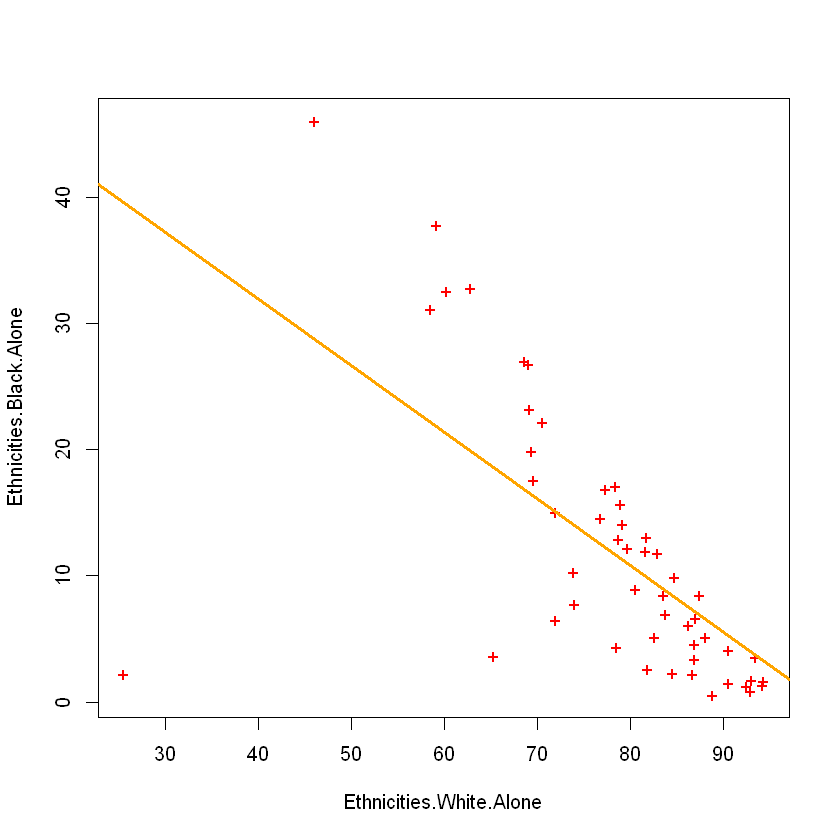

In [24]:
plot(Ethnicities.Black.Alone~Ethnicities.White.Alone,col="red",pch="+")
abline(lm.fit,lwd=3,col="orange")

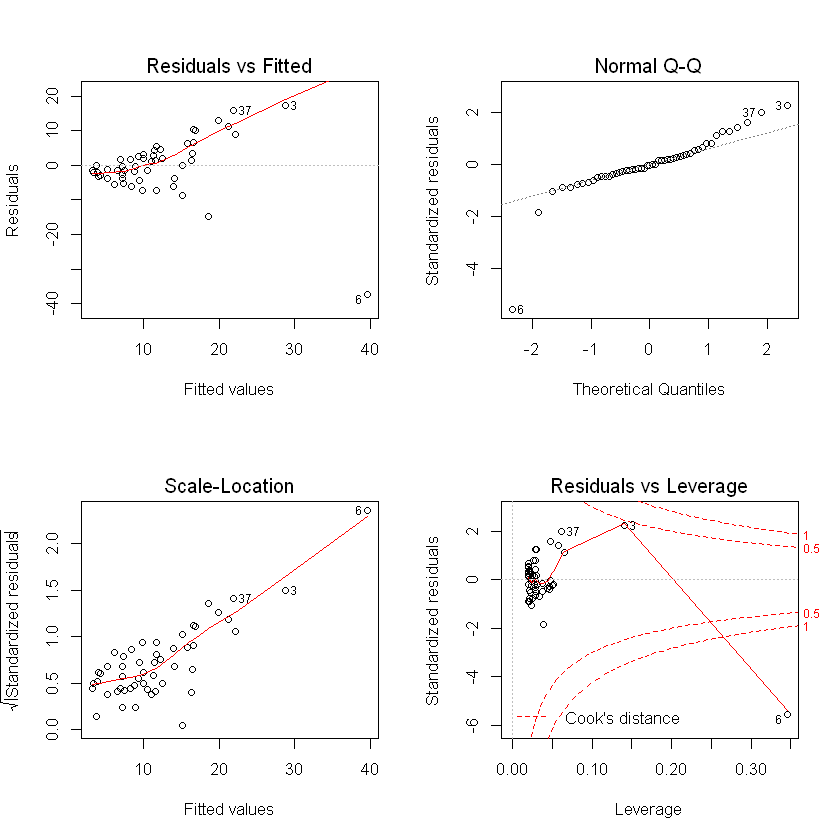

In [25]:
par(mfrow=c(2,2))
plot(lm.fit)

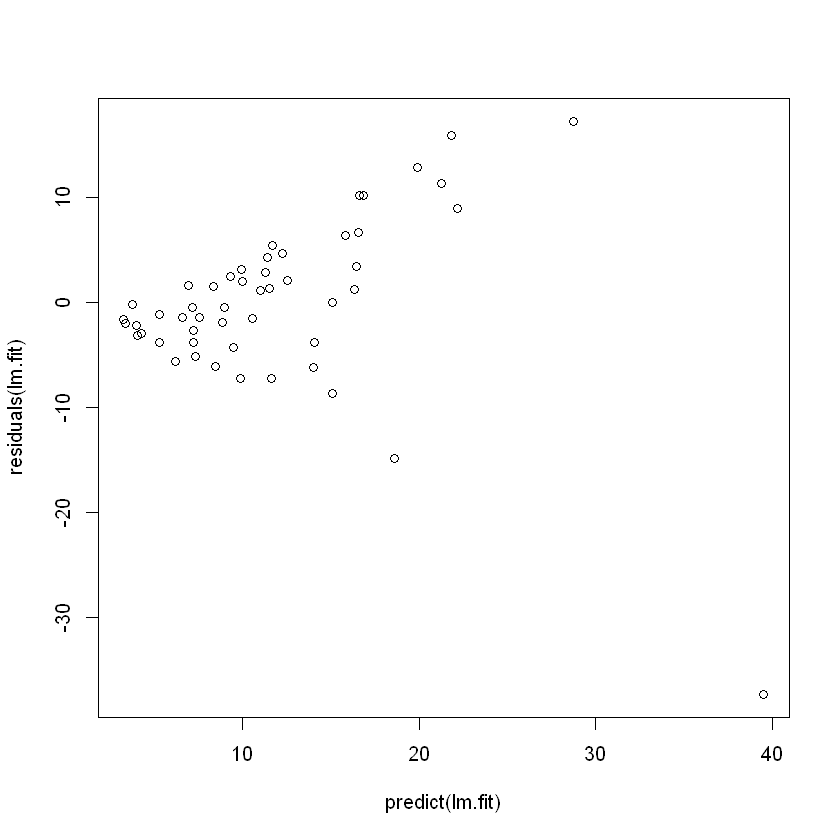

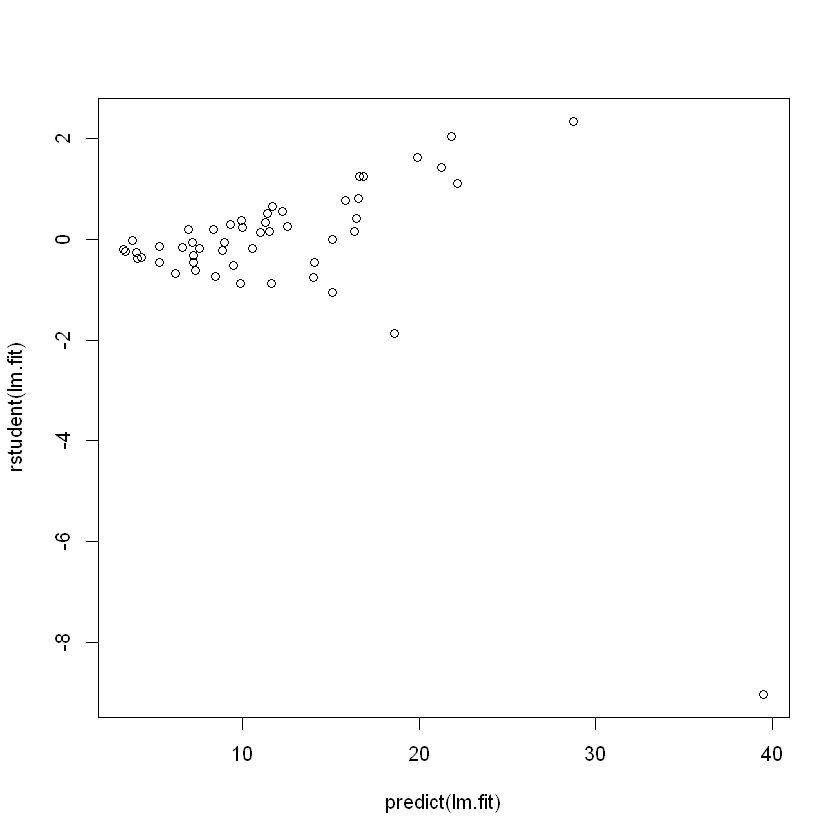

In [29]:
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

6 
6

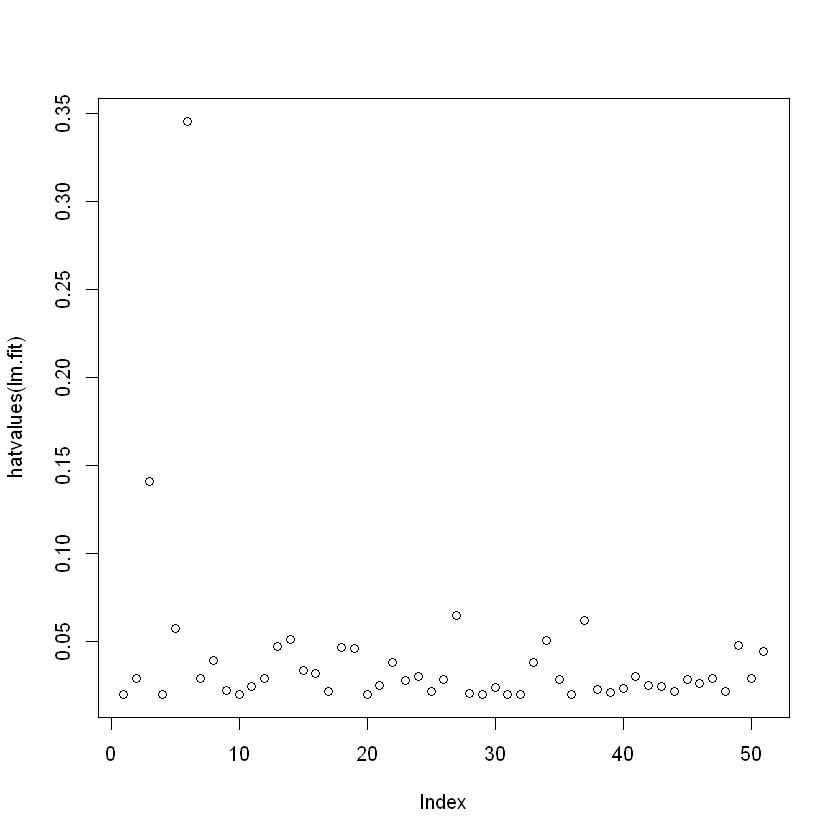

In [30]:
plot(hatvalues(lm.fit))
which.max(hatvalues(lm.fit))

In [35]:
lm.fit<-lm(Employment.Firms.Total~Employment.Firms.Men.Owned+Employment.Firms.Women.Owned)
summary(lm.fit)


Call:
lm(formula = Employment.Firms.Total ~ Employment.Firms.Men.Owned + 
    Employment.Firms.Women.Owned)

Residuals:
   Min     1Q Median     3Q    Max 
-48926  -7305   -757   8550  33257 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.009e+04  2.666e+03   3.786 0.000426 ***
Employment.Firms.Men.Owned   9.774e-01  5.552e-02  17.605  < 2e-16 ***
Employment.Firms.Women.Owned 1.287e+00  7.925e-02  16.233  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13940 on 48 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9996 
F-statistic: 5.625e+04 on 2 and 48 DF,  p-value: < 2.2e-16


In [34]:
lm.fit<-lm(Employment.Firms.Total ~ .,data = mydata)
summary(lm.fit)


Call:
lm(formula = Employment.Firms.Total ~ ., data = mydata)

Residuals:
ALL 51 residuals are 0: no residual degrees of freedom!

Coefficients: (46 not defined because of singularities)
                                                             Estimate
(Intercept)                                                    374153
StateAlaska                                                   -306121
StateArizona                                                   125773
StateArkansas                                                 -142194
StateCalifornia                                               3174296
StateColorado                                                  173199
StateConnecticut                                               -47460
StateDelaware                                                 -300735
StateDistrict of Columbia                                     -310745
StateFlorida                                                  1726034
StateGeorgia                              

In [36]:
vif(lm.fit)

ERROR: Error in vif(lm.fit): could not find function "vif"


In [37]:
lm.fit<-lm(Employment.Firms.Total ~ . - State ,data = mydata)
summary(lm.fit)


Call:
lm(formula = Employment.Firms.Total ~ . - State, data = mydata)

Residuals:
         1          2          3          4          5          6          7 
  -26.0078   317.0603   -20.4744    12.2037    97.7317   -26.0311   535.2292 
         8          9         10         11         12         13         14 
  -11.2818  -534.7150   343.7534    -3.7410   494.1034  -255.6123    70.4675 
        15         16         17         18         19         20         21 
 -185.4276  -376.6482    38.4996    95.6745   105.7109   229.7585  -297.1184 
        22         23         24         25         26         27         28 
  -92.5192   328.9104  -348.3972   -90.0719   -88.5439  -351.4428   285.7213 
        29         30         31         32         33         34         35 
   94.5325  -335.4267 -1088.1075   116.3371    26.4119  -505.8867  -102.5548 
        36         37         38         39         40         41         42 
  262.2801    -0.4946   405.2805   -18.7916   149.8766   16

In [39]:
lm.fit1<-update(lm.fit,~.-State)
summary(lm.fit1)


Call:
lm(formula = Employment.Firms.Total ~ Population.Population.Percent.Change + 
    Population.2014.Population + Population.2010.Population + 
    Age.Percent.Under.5.Years + Age.Percent.Under.18.Years + 
    Age.Percent.65.and.Older + Miscellaneous.Percent.Female + 
    Ethnicities.White.Alone + Ethnicities.Black.Alone + Ethnicities.American.Indian.and.Alaska.Native.Alone + 
    Ethnicities.Asian.Alone + Ethnicities.Native.Hawaiian.and.Other.Pacific.Islander.Alone + 
    Ethnicities.Two.or.More.Races + Ethnicities.Hispanic.or.Latino + 
    Ethnicities.White.Alone..not.Hispanic.or.Latino + Miscellaneous.Veterans + 
    Miscellaneous.Foreign.Born + Housing.Housing.Units + Housing.Homeownership.Rate + 
    Housing.Median.Value.of.Owner.Occupied.Units + Housing.Households + 
    Housing.Persons.per.Household + Miscellaneous.Living.in.Same.House..1.Years + 
    Miscellaneous.Language.Other.than.English.at.Home + Housing.Households.with.a.computer + 
    Housing.Households.with.a.Inter

In [40]:
lm.fit<-lm(Employment.Firms.Total~Employment.Firms.Men.Owned*Employment.Firms.Women.Owned)
summary(lm.fit)


Call:
lm(formula = Employment.Firms.Total ~ Employment.Firms.Men.Owned * 
    Employment.Firms.Women.Owned)

Residuals:
   Min     1Q Median     3Q    Max 
-47752  -8008  -1154   8521  36518 

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                             1.447e+04  3.247e+03
Employment.Firms.Men.Owned                              1.005e+00  5.492e-02
Employment.Firms.Women.Owned                            1.198e+00  8.620e-02
Employment.Firms.Men.Owned:Employment.Firms.Women.Owned 3.221e-08  1.463e-08
                                                        t value Pr(>|t|)    
(Intercept)                                               4.458 5.12e-05 ***
Employment.Firms.Men.Owned                               18.307  < 2e-16 ***
Employment.Firms.Women.Owned                             13.898  < 2e-16 ***
Employment.Firms.Men.Owned:Employment.Firms.Women.Owned   2.201   0.0327 *  
---
Signif. codes:  0 

In [41]:
lm.fit2<-lm(Employment.Firms.Total~Employment.Firms.Men.Owned + I(Employment.Firms.Men.Owned^2))
summary(lm.fit2)


Call:
lm(formula = Employment.Firms.Total ~ Employment.Firms.Men.Owned + 
    I(Employment.Firms.Men.Owned^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-111166   -9761    -898   12011   86359 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.536e+04  7.806e+03   1.968  0.05486 .  
Employment.Firms.Men.Owned      1.756e+00  3.638e-02  48.276  < 2e-16 ***
I(Employment.Firms.Men.Owned^2) 7.915e-08  2.288e-08   3.459  0.00115 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31780 on 48 degrees of freedom
Multiple R-squared:  0.9978,	Adjusted R-squared:  0.9977 
F-statistic: 1.081e+04 on 2 and 48 DF,  p-value: < 2.2e-16


In [42]:
anova(lm.fit,lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
47,8457679078,NA,NA,NA,NA
48,48465859596,-1,-40008180517,222.3287,1.932098e-19


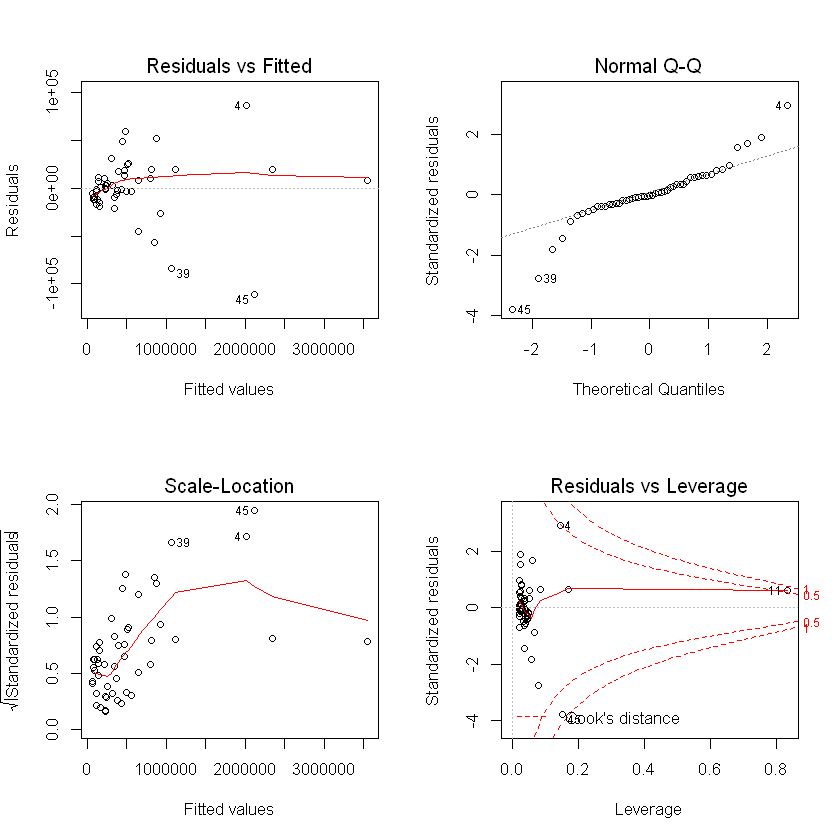

In [43]:
par(mfrow = c(2,2))
plot(lm.fit2)

In [45]:
lm.fit5<-lm(Employment.Firms.Total~poly(Employment.Firms.Men.Owned,5))
summary(lm.fit5)


Call:
lm(formula = Employment.Firms.Total ~ poly(Employment.Firms.Men.Owned, 
    5))

Residuals:
    Min      1Q  Median      3Q     Max 
-106830  -10777    1554    9596   92354 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            545255       4421 123.339  < 2e-16 ***
poly(Employment.Firms.Men.Owned, 5)1  4670569      31571 147.940  < 2e-16 ***
poly(Employment.Firms.Men.Owned, 5)2   109913      31571   3.481  0.00112 ** 
poly(Employment.Firms.Men.Owned, 5)3    30204      31571   0.957  0.34382    
poly(Employment.Firms.Men.Owned, 5)4   -49308      31571  -1.562  0.12534    
poly(Employment.Firms.Men.Owned, 5)5    16435      31571   0.521  0.60521    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31570 on 45 degrees of freedom
Multiple R-squared:  0.9979,	Adjusted R-squared:  0.9977 
F-statistic:  4380 on 5 and 45 DF,  p-value: < 2.2e-16
